

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [3]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-19'] ['2016-12-18'] ['2016-12-13']
['2016-12-18']
'2016-12-18'


### get url

In [4]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-18'


In [5]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [6]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [8]:
df = pd.read_csv(url)

In [9]:
df.shape

(39, 16)

#### wow, 5 days > 1000 reports

In [10]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6640512,12/18/2016 11:13:26 PM,NaN,12/18/2016 11:13:26 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LEAVENWORTH ST and SUTTER ST,3,Lower Nob Hill,"(37.7883877916853, -122.41518523659)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
1,6640498,12/18/2016 10:32:05 PM,NaN,12/18/2016 10:52:20 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1500 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.7489895689, -122.416097672246)",Voice In,NaN
2,6640495,12/18/2016 10:28:23 PM,NaN,12/18/2016 10:28:23 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BEALE ST and HARRISON ST,6,Rincon Hill,"(37.7874551164624, -122.391179585987)",Open311,NaN


In [11]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [12]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6640512,2016-12-18 23:13:26,NaT,2016-12-18 23:13:26,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LEAVENWORTH ST and SUTTER ST,3,Lower Nob Hill,"(37.7883877916853, -122.41518523659)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
1,6640498,2016-12-18 22:32:05,NaT,2016-12-18 22:52:20,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1500 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.7489895689, -122.416097672246)",Voice In,NaN
2,6640495,2016-12-18 22:28:23,NaT,2016-12-18 22:28:23,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BEALE ST and HARRISON ST,6,Rincon Hill,"(37.7874551164624, -122.391179585987)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=18.0, right=18.0
  'left=%s, right=%s') % (left, right))


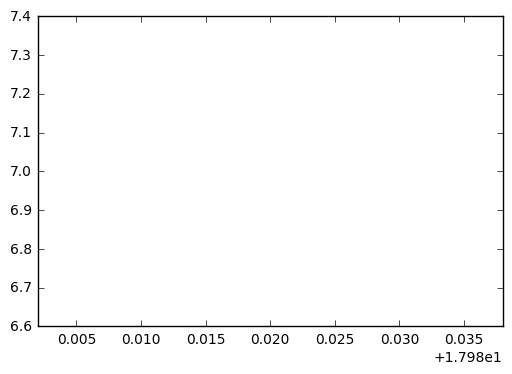

In [13]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=18.0, right=18.0
  'left=%s, right=%s') % (left, right))


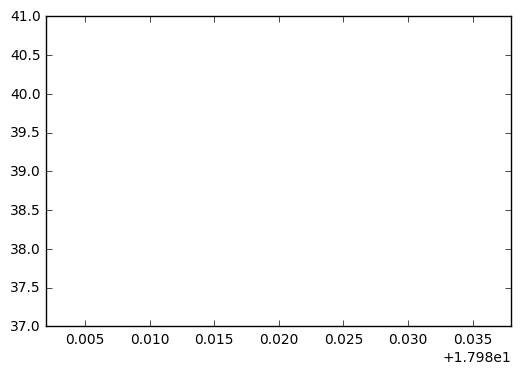

In [14]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=6.0, right=6.0
  'left=%s, right=%s') % (left, right))


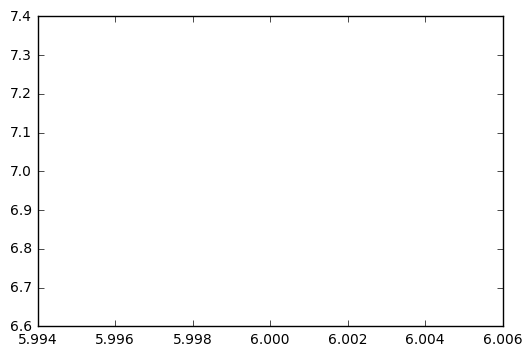

In [15]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [16]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [17]:

df['Request Details'].value_counts()


Encampment Cleanup    39
Name: Request Details, dtype: int64

In [18]:
df['Supervisor District'].value_counts().sort_index()



1      1
3      4
5      2
6     14
8      5
9     11
10     1
11     1
Name: Supervisor District, dtype: int64

In [19]:
df.Neighborhood.value_counts()

Mission               10
South of Market        7
Financial District     3
Castro                 3
Rincon Hill            3
North Beach            2
Dolores Heights        1
Outer Richmond         1
Lower Nob Hill         1
Merced Heights         1
Golden Gate Park       1
Holly Park             1
Showplace Square       1
Tenderloin             1
Corona Heights         1
Central Waterfront     1
Name: Neighborhood, dtype: int64

In [20]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
1,6640498,2016-12-18 22:32:05,NaT,2016-12-18 22:52:20,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1500 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.7489895689, -122.416097672246)",Voice In,NaN
7,6640324,2016-12-18 19:36:37,2016-12-18 20:39:46,2016-12-18 20:39:46,Closed,Case is Invalid - Invaild SR. No contact info and Photo doesn't show what the issue is.,311 Supervisor Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"3435 26TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.748881957958, -122.418944321796)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585755be3da153f1b6e80a4f/report.jpg
17,6639677,2016-12-18 13:56:52,2016-12-18 18:40:19,2016-12-18 18:40:19,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2132 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.763157528337, -122.415241067614)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5857061c3da153f1b6e8030f/report.jpg
19,6639568,2016-12-18 13:10:32,NaT,2016-12-18 13:10:32,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN
22,6639323,2016-12-18 11:22:15,NaT,2016-12-18 11:24:09,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of CALEDONIA ST and 15TH ST,9,Mission,"(37.7665704473143, -122.421531181949)",Voice In,NaN
23,6639267,2016-12-18 11:09:03,2016-12-18 13:45:07,2016-12-18 13:45:07,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2850 CESAR CHAVEZ ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.748886738082, -122.406675527324)",Open311,NaN
24,6639262,2016-12-18 11:07:42,NaT,2016-12-18 11:07:42,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1368 POTRERO AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.750798757193, -122.406169364537)",Open311,NaN
26,6639212,2016-12-18 10:50:46,NaT,2016-12-18 10:50:46,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 14TH ST and TRAINOR ST,9,Mission,"(37.7686021036354, -122.414540135493)",Open311,NaN
27,6639204,2016-12-18 10:47:44,NaT,2016-12-18 10:47:44,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of DIVISION ST and FLORIDA ST,9,Mission,"(37.7686928417827, -122.411758944213)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5856d9c93da153f1b6e7fcf8/report.jpg
30,6638918,2016-12-18 08:43:51,NaT,2016-12-18 08:43:51,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 13TH ST and SOUTH VAN NESS AVE,6,Mission,"(37.7698151022261, -122.417753270894)",Open311,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [21]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [22]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0    http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
1                                                                                                 NaN
2                                                                                                 NaN
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856b4e43da153f1b6e7f8f7/report.jpg
Name: Media URL, dtype: object


In [23]:
print(peskin[:])

0    http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
1                                                                                                 NaN
2                                                                                                 NaN
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856b4e43da153f1b6e7f8f7/report.jpg
Name: Media URL, dtype: object


# The whole City

In [24]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585755be3da153f1b6e80a4f/report.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b943da153f1b6e8095f/photo_20161218_185216.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585746c43da153f1b6e80924/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585732363da153f1b6e807a1/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5857321d3da153f1b6e80797/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/585711433da153f1b6e80422/photo_20161218_144315.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5857061c3da153f1b6e8030f/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [31]:
len(images)

91

In [32]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b943da153f1b6e8095f/photo_20161218_185216.jpg


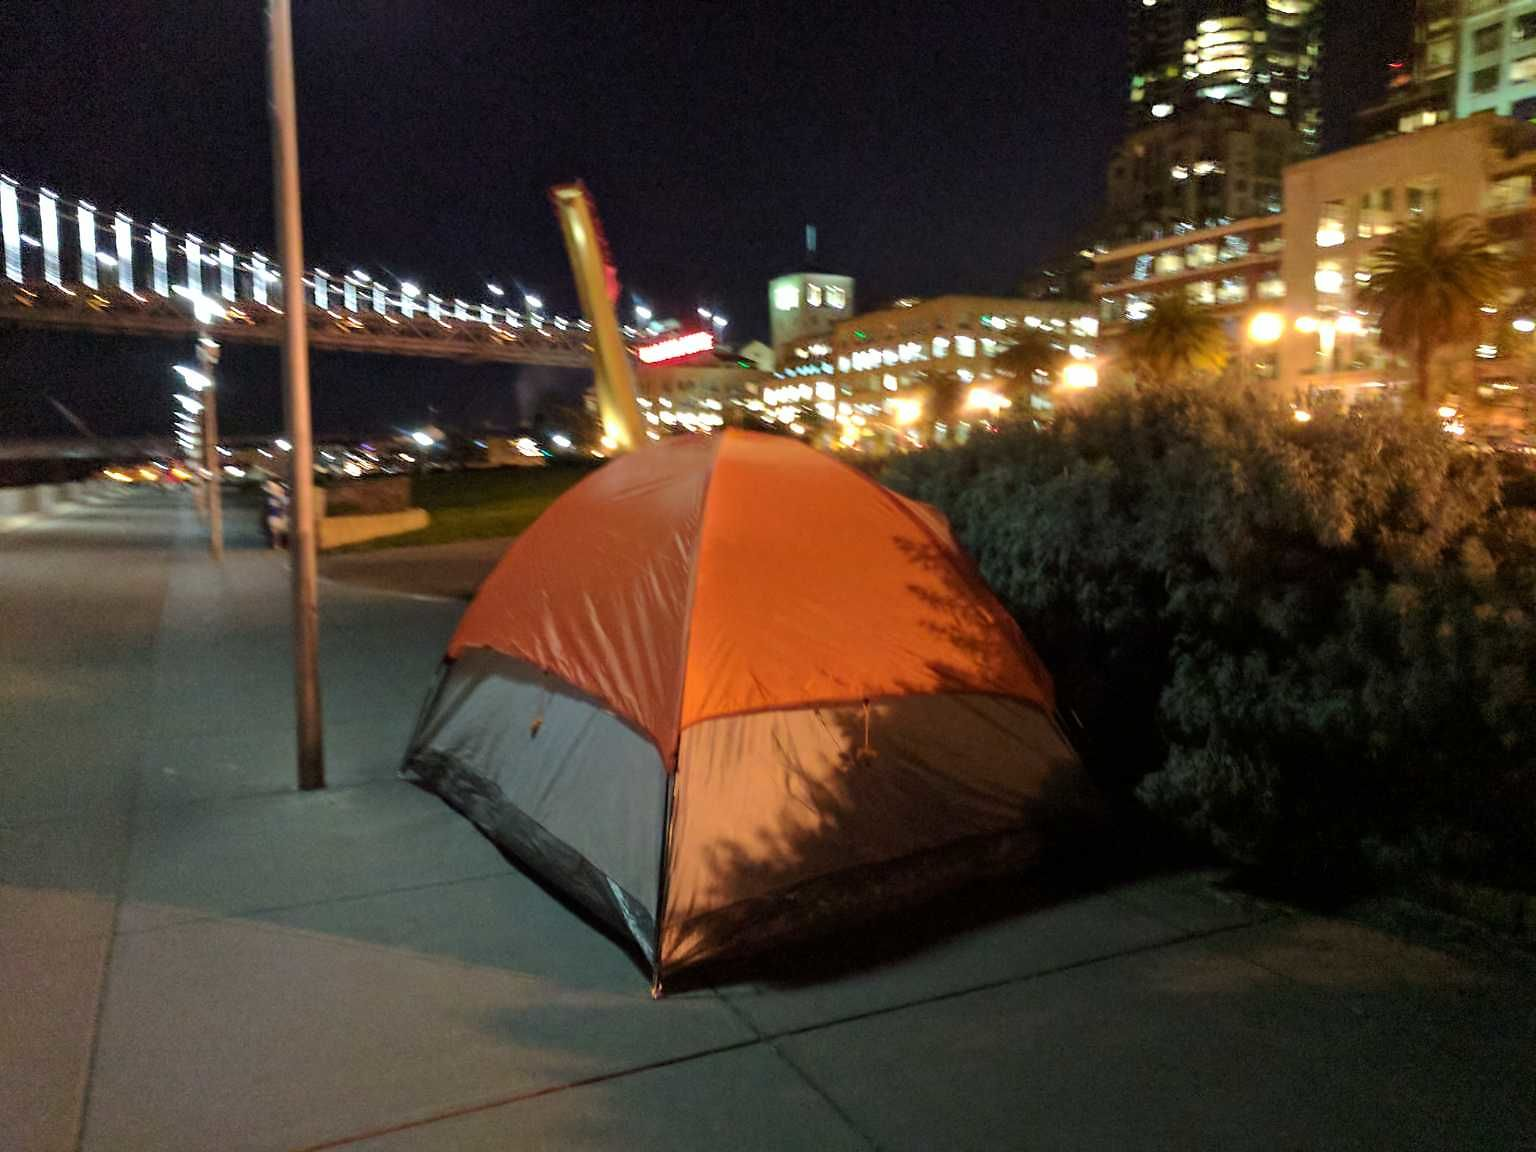

In [25]:
print(images[2])
Image(images[2])


In [26]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [27]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [28]:
!yes| bash vidCreate.sh 

--2016-12-20 12:18:54--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585788913da153f1b6e80b78/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133140 (130K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 130.02K   836KB/s    in 0.2s    

2016-12-20 12:18:54 (836 KB/s) - 'report.jpg' saved [133140/133140]

--2016-12-20 12:18:54--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585755be3da153f1b6e80a4f/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 51996 (51K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>]  50.78K  --.-KB/s    in 0s      

2016-12-20 12:18:54 (243 MB/s) - 'report.jpg.1' saved [51996/51996]

--2016-12-20 12:18:54--  htt

In [ ]:
!ls -la
